In [31]:
import torch 
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
%inline matplotlib


UsageError: Line magic function `%inline` not found.


In [3]:

data = pd.read_table('fra.txt', header= None)

In [4]:
data.rename(columns= {0: 'English', 1: 'French', 2: 'Citation'}, inplace= True)

In [5]:
pattern = r"[!'#$%&()*+,-./:;<=>?@[\]^`{|}~“”‘’«»‹›„‚–—…·•¡¿’\"\']"

eng_sent, french_sent = [], []

for e in range(len(data['English'])):
    eng_sent.append(re.sub(pattern, "", data['English'][e]))
    french_sent.append(re.sub(pattern, "", data['French'][e]))

In [6]:
print(len(eng_sent))
print(len(french_sent))

229803
229803


In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
eng_token = [tokenizer.encode(text, add_special_tokens= True) for text in eng_sent]
fren_token = [tokenizer.encode(text, add_special_tokens= True) for text in french_sent]

In [9]:
model = BertModel.from_pretrained('bert-base-uncased')


8


In [28]:
def padding(tokens, max_len):
    temp = []
    for token in tokens:
        if max_len > len(token):
            temp.append(token + [tokenizer.pad_token_id 
                                 for i in range(max_len - len(token))])
        else:
            temp.append(token[:max_len])

    return temp

In [11]:
def text_embedding(batch_tokens, max_len):
    batch_padded_tokens = padding(batch_tokens, max_len)
    tokens_tensor = torch.tensor(batch_padded_tokens)
    with torch.no_grad():
        output = model(tokens_tensor)
        embeddings = output.last_hidden_state
    return embeddings

Average len: 8


{'whiskers': [<matplotlib.lines.Line2D at 0x28de21f00>,
 'caps': [<matplotlib.lines.Line2D at 0x28de22440>,
 'boxes': [<matplotlib.lines.Line2D at 0x28de20b20>],
 'medians': [<matplotlib.lines.Line2D at 0x28de22980>],
 'fliers': [<matplotlib.lines.Line2D at 0x28de22ec0>],
 'means': [<matplotlib.lines.Line2D at 0x28de22c20>]}

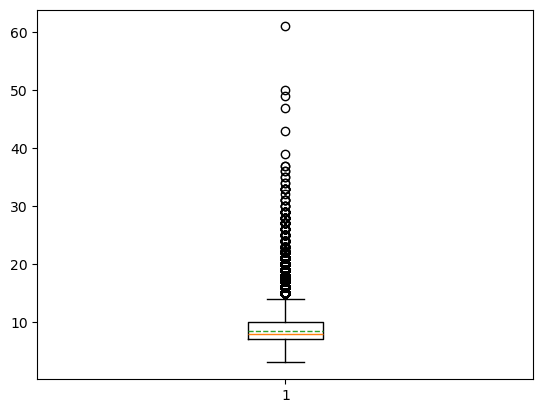

In [32]:
eng_sum = 0
eng_token_len = []
for tokens in eng_token:
    eng_sum += len(tokens)
    eng_token_len.append(len(tokens))

eng_avg_len = eng_sum // len(eng_token)
print("Average len: {}".format(eng_avg_len))
plt.boxplot(eng_token_len, meanline= True, showmeans= True)

Average len: 12


{'whiskers': [<matplotlib.lines.Line2D at 0x2bc88e710>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc88ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc88e470>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc88f190>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc88f6d0>],
 'means': [<matplotlib.lines.Line2D at 0x2bc88f430>]}

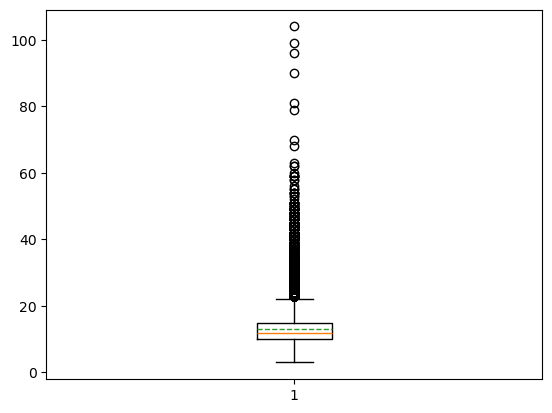

In [33]:
fren_sum = 0
fren_token_len = []
for tokens in fren_token:
    fren_sum += len(tokens)
    fren_token_len.append(len(tokens))

fren_avg_len = fren_sum // len(fren_token)

print("Average len: {}".format(fren_avg_len))
plt.boxplot(fren_token_len, meanline= True, showmeans= True)

In [29]:
batch_size = 1000

eng_embedding = []
for i in tqdm(range(0, len(eng_token), batch_size), "Embedding", colour= "green"):
    batch_token = eng_token[i : i+batch_size]
    eng_embedding.extend(text_embedding(batch_token, eng_avg_len))

len(eng_embedding)

Embedding: 100%|██████████| 230/230 [05:52<00:00,  1.53s/it]


229803

In [30]:
batch_size = 10000

fren_embedding = []
for i in tqdm(range(0, len(fren_token), batch_size), "Embedding", colour= "green"):
    batch_token = fren_token[i : i+batch_size]
    fren_embedding.extend(text_embedding(batch_token, fren_avg_len))

len(fren_embedding)

Embedding: 100%|██████████| 23/23 [09:35<00:00, 25.04s/it]


229803

In [41]:
tokenizer.vocab

OrderedDict([('[PAD]', 0),
             ('[unused0]', 1),
             ('[unused1]', 2),
             ('[unused2]', 3),
             ('[unused3]', 4),
             ('[unused4]', 5),
             ('[unused5]', 6),
             ('[unused6]', 7),
             ('[unused7]', 8),
             ('[unused8]', 9),
             ('[unused9]', 10),
             ('[unused10]', 11),
             ('[unused11]', 12),
             ('[unused12]', 13),
             ('[unused13]', 14),
             ('[unused14]', 15),
             ('[unused15]', 16),
             ('[unused16]', 17),
             ('[unused17]', 18),
             ('[unused18]', 19),
             ('[unused19]', 20),
             ('[unused20]', 21),
             ('[unused21]', 22),
             ('[unused22]', 23),
             ('[unused23]', 24),
             ('[unused24]', 25),
             ('[unused25]', 26),
             ('[unused26]', 27),
             ('[unused27]', 28),
             ('[unused28]', 29),
             ('[unused29]', 30),
  